## Test PercepLoss trained on photo-geometry

In [1]:
# Test codes 

import os
import requests
import torch

def load_pretrained_rotnet(model):
    save_name = './models/rotnet_imagenet.pth'
    url = 'https://dl.fbaipublicfiles.com/deepcluster/rotnet/rotnet_imagenet.pth'
    
    if not os.path.exists(save_name):
        r = requests.get(url, allow_redirects=True)
        open(save_name, 'wb').write(r.content)

    checkpoint = torch.load(save_name)
    checkpoint['state_dict'] = {rename_key(key): val
                                for key, val
                                in checkpoint['state_dict'].items()}

    if 'pred_layer.weight' in checkpoint['state_dict']:
        del checkpoint['state_dict']['pred_layer.weight']
        del checkpoint['state_dict']['pred_layer.bias']
    
    model.load_state_dict(checkpoint['state_dict'])
    print("succefully loaded")

def rename_key(key):
    "Remove module from key"
    if not 'module' in key:
        return key
    if key.startswith('module.body.'):
        return key[12:]
    if key.startswith('module.'):
        return key[7:]
    return ''.join(key.split('.module'))

    


/root/miniconda3/envs/neural_render_test/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from unsup3d.model import PercepLoss
from unsup3d.modules import VGG16
from torchvision import models as pre_models


#tv_vgg = pre_models.vgg16()
rt_vgg = VGG16(dim_in=3)
load_pretrained_rotnet(rt_vgg)


succefully loaded
succefully loaded


In [3]:

PL = PercepLoss()

a1 = torch.rand(7,3,64,64)
b1 = torch.rand(7,1,16,16)
a2 = torch.rand(7,3,64,64)
#b2 = torch.rand(7,1,64,64)

b = PL(a1,a2,b1)

use self-supervised pretrained vgg (rotenet)
succefully loaded


## Test Asymmetric Perturbation

perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
perturbing!
pert

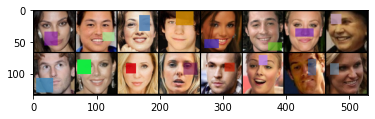

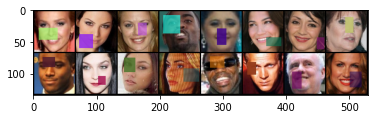

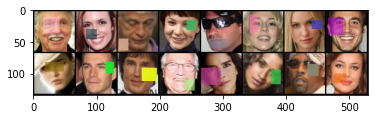

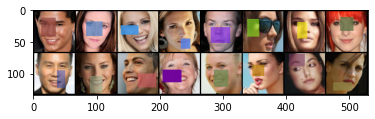

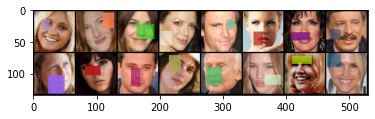

In [4]:
from unsup3d.dataloader import CelebA
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt

WITH_PERTURB = True

ds = CelebA()
dl = DataLoader(ds, batch_size = 16)

for i, images in enumerate(dl):
    if i == 5:
        break
    img_grid = torchvision.utils.make_grid(images, normalize=False)

    plt.figure()
    plt.imshow(img_grid.permute(1,2,0))